In [2]:
import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,url,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,https://www.netflix.com/title/60000724,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2313221.0,MX
1,https://www.netflix.com/title/1154386,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516523.0,"AT, CH, DE"
2,https://www.netflix.com/title/60031236,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1220488.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,https://www.netflix.com/title/70021659,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211314.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, BG..."
4,https://www.netflix.com/title/1080395,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443310.0,"AU, BA, BE, BG, CZ, HR, HU, MD, ME, MK, NZ, PL..."


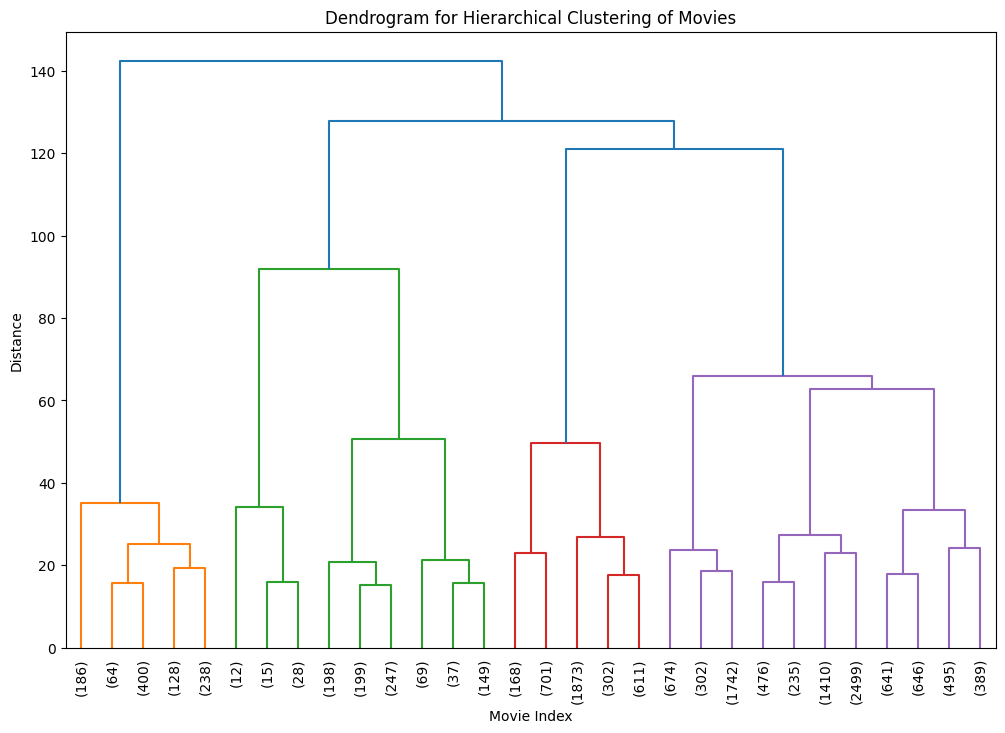

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant columns and drop missing values
numeric_data = data[['releaseYear', 'imdbAverageRating', 'imdbNumVotes']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply hierarchical clustering using 'ward' method
linkage_matrix = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=numeric_data.index, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering of Movies")
plt.xlabel("Movie Index")
plt.ylabel("Distance")
plt.show()


In [ ]:
cleaned_data = data[['imdbAverageRating', 'imdbNumVotes']].dropna()

cleaned_data.describe()
print(cleaned_data.head())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(cleaned_data)

normalized_data[:5]


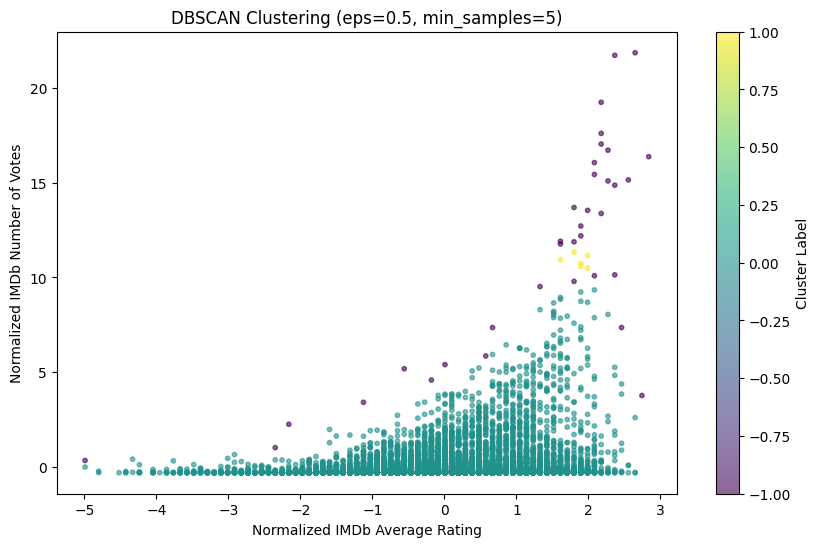

In [18]:

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.xlabel('Normalized IMDb Average Rating')
plt.ylabel('Normalized IMDb Number of Votes')
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.show()
